<a href="https://colab.research.google.com/github/aduboysky/final/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Итоговый проект по курсу "Python для анализа данных"

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

## Задание 1: Загрузка файла HR.csv в pandas dataframe

In [ ]:
df = pd.read_csv("HR.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


## Задание 2: Расчет основных статистик для переменных

In [ ]:
def basic_stats(col:pd.Series):
    if col.dtype != "object":
        max_ = col.max()
        min_ = col.min()
        mean = col.mean()
        median = col.median()
        mode = list(col.mode())
        std = col.std()
        iqr = col.quantile(0.75)- col.quantile(0.25)
        lower_bound = col.quantile(0.25)-(1.5*iqr)
        upper_bound = col.quantile(0.75)+(1.5*iqr)
        outliers = [x for x in col[~col.between(lower_bound,upper_bound)] if not np.isnan(x)]
        n_outliers = len(outliers)
        nan_count = col.isna().sum()
        return [max_, min_, mean, median, mode, std, iqr, outliers, n_outliers, nan_count, col.unique()]
    return np.NAN

In [ ]:
df.apply(basic_stats).rename(index={0: "max", 1: "min", 2:"mean", 3:"median", 4:"mode", 5:"std", 6:"iqr", 7:"outliers", 8:"n_outliers", 9:"nan_count", 10:"unique"})

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
max,1.0,1.0,7,310,10,1,1,1,NaN,NaN
min,0.09,0.36,2,96,2,0,0,0,NaN,NaN
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.14461,0.238083,0.021268,NaN,NaN
median,0.64,0.72,4.0,200.0,3.0,0.0,0.0,0.0,NaN,NaN
mode,[0.1],[0.55],[4],"[135, 156]",[3],[0],[0],[0],NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
iqr,0.38,0.31,2.0,89.0,1.0,0.0,0.0,0.0,NaN,NaN
outliers,[],[],[],[],"[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",NaN,NaN
n_outliers,0,0,0,0,1282,2169,3571,319,NaN,NaN
nan_count,0,0,0,0,0,0,0,0,NaN,NaN


## Задание 3: Корреляционная матрица

При построении корреляционной матрицы будем использовать только числовые столбцы, а также исключим столбцы, где величина принимает только значения 0 или 1:

In [ ]:
cor_mat = df.drop(columns = ["Work_accident", "left", "promotion_last_5years"]).corr("spearman",numeric_only=True)
cor_mat

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.162407,0.005786,0.062000,-0.139428
last_evaluation,0.162407,1.000000,0.350399,0.342061,0.161154
number_project,0.005786,0.350399,1.000000,0.397855,0.251971
average_montly_hours,0.062000,0.342061,0.397855,1.000000,0.168750
time_spend_company,-0.139428,0.161154,0.251971,0.168750,1.000000


<Axes: >

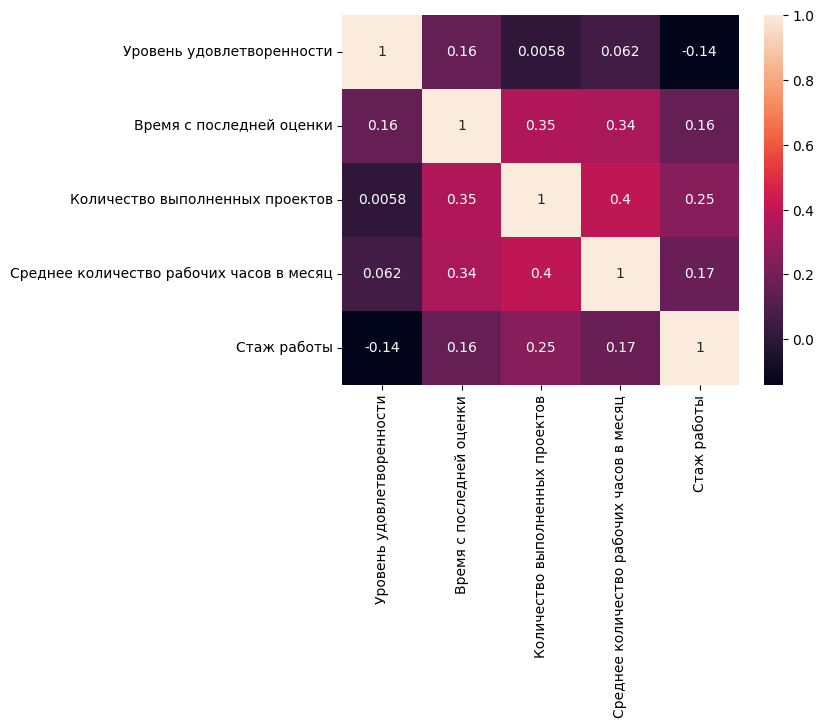

In [ ]:
labels = ["Уровень удовлетворенности","Время с последней оценки","Количество выполненных проектов","Среднее количество рабочих часов в месяц","Стаж работы",]
sns.heatmap(cor_mat, annot = True, xticklabels=labels, yticklabels=labels)

Как видно из визуализации, наиболее сильно скоррелированы величины среднего количества рабочих часов в месяц и количество выполненных проектов, а наименее - количество выполненных проектов и уровень удовлетворенности.

## Задание 4: Расчет количества сотрудников по департаментам

In [ ]:
df.department.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

## Задание 5: Распределение сотрудников по уровню заработной платы

In [ ]:
df.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

<Axes: xlabel='salary', ylabel='count'>

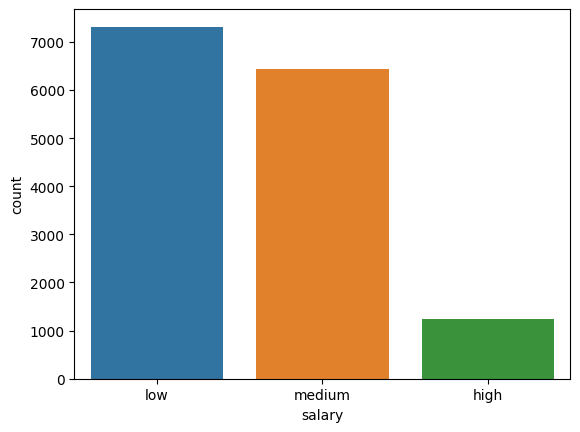

In [ ]:
sns.countplot(x = df.salary)

## Задание 6: Распределение сотрудников по зарплатам в каждом департаменте по отдельности

<Axes: xlabel='count', ylabel='department'>

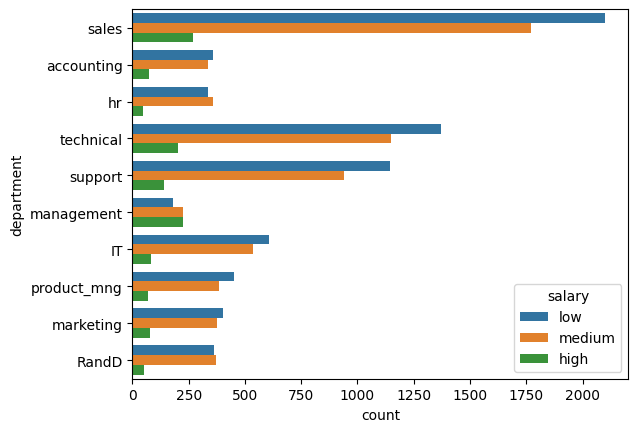

In [ ]:
sns.countplot(data = df, y = "department", hue = "salary",)

## Задание 7: Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

Нулевая гипотеза - нет статистически значимой разницы проведенного времени на работе между сотрудниками с высоким и низким окладом.

Альтернативная гипотеза - существует статистически значимая разница проведенного времени на работе между сотрудниками с высоким и низким окладом.

In [ ]:
stat, p = st.ttest_ind(df[df.salary == "low"].average_montly_hours, df[df.salary == "high"].average_montly_hours)
p

0.4661023478267259

Поскольку p > 0.05, то мы не можем отклонить нулевую гипотезу при уровне значимости, равном 0.05.

In [ ]:
df.groupby("salary").average_montly_hours.mean()

salary
high      199.867421
low       200.996583
medium    201.338349
Name: average_montly_hours, dtype: float64

Более того, простое сравнение средних значений проведенного на работе времени для разных зарплатных категорий показывает, что работники вне зависимости от уровня оклада проводят на работе, в среднем, примерно одно и то же время в месяц.

Таким образом, гипотезу о том, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом, можно отклонить.

## Задание 8: Сравнительный расчет показателей среди уволившихся и не уволившихся сотрудников

### Доля сотрудников с повышением за последние 5 лет

In [ ]:
df.groupby("left").promotion_last_5years.value_counts(normalize = True)*100

left  promotion_last_5years
0     0                        97.374869
      1                         2.625131
1     0                        99.467936
      1                         0.532064
Name: promotion_last_5years, dtype: float64

Таким образом, получим:
* Среди оставшихся в компании сотрудников, доля получивших повышение за последние 5 лет составляет 2.6%
* Среди покинувших компанию сотрудников, доля получивших повышение за последние 5 лет составляет 0.5%

### Средняя степень удовлетворенности

In [ ]:
df.groupby("left").satisfaction_level.mean()*100

left
0    66.680959
1    44.009801
Name: satisfaction_level, dtype: float64

Таким образом, получим:
* Среди оставшихся в компании сотрудников, средняя степень удовлетворенности составляет 66.7%
* Среди покинувших компанию сотрудников, средняя степень удовлетворенности составляет 44.0%

### Среднее количество проектов

In [ ]:
df.groupby("left").number_project.mean()

left
0    3.786664
1    3.855503
Name: number_project, dtype: float64

Таким образом, получим:
* Среди оставшихся в компании сотрудников, среднее количество проектов равно 3.8
* Среди покинувших компанию сотрудников, среднее количество проектов равно 3.9

## Задание 9: Построение и оценка модели LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов

Для построения модели удаляем столбцы "department" и "salary" по условию, а также "number_project", поскольку после его удаления качество модели возрастает.

In [ ]:
data = df.drop(columns = ["department", "salary", "number_project",])
data

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,157,3,0,1,0
1,0.80,0.86,262,6,0,1,0
2,0.11,0.88,272,4,0,1,0
3,0.72,0.87,223,5,0,1,0
4,0.37,0.52,159,3,0,1,0
...,...,...,...,...,...,...,...
14994,0.40,0.57,151,3,0,1,0
14995,0.37,0.48,160,3,0,1,0
14996,0.37,0.53,143,3,0,1,0
14997,0.11,0.96,280,4,0,1,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, data["left"], random_state=42)

In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
result = pd.DataFrame([y_test.array, lda.predict(X_test)]).T.rename(columns = {"left":"0", "Unnamed 0":"1"})
result

,0,1
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
...,...,...
3745,0,0
3746,1,0
3747,0,0
3748,0,1


In [ ]:
df["left"].value_counts(normalize = True)*100

0    76.191746
1    23.808254
Name: left, dtype: float64

Поскольку количество увольвшихся работников значительно меньше количества оставшихся, для определения качества модели используем recall score.

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test.array, lda.predict(X_test))

0.2608695652173913

Таким образом, точность полученной модели в выявлении сотрудников, желающих уволиться, довольно низка, следовательно, для определения таких сотрудников следует либо использовать другую модель, либо расширить исходные данные.

